C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: RuntimeWarning: overflow encountered in square
  positive)
C:\Users\user\Anaconda3\lib\site-packages\numpy\core\_methods.py:36: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5007.519818968558, tolerance: 28.300082587912915
  positive)


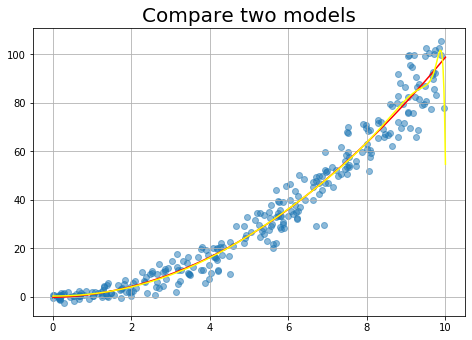

In [365]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(2),
                           LinearRegression())
poly_model2 = make_pipeline(PolynomialFeatures(200),
                           Lasso(alpha=1))
fig = plt.figure() 
axes1 = fig.add_axes([0.5,0.5,1,1]) 
plt.grid(True,which='both')
plt.title("Compare two models",fontsize=20)
rng = np.random.RandomState(1)
xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])
x = 10 * rng.rand(300)
y = x**2 + x*rng.randn(300)+ rng.randn(300)
poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])
poly_model2.fit(x[:, np.newaxis], y)
yfit2 = poly_model2.predict(xfit[:, np.newaxis])
plt.scatter(x, y,alpha=0.5)
plt.plot(xfit, yfit,color="red")
plt.plot(xfit, yfit2,color="yellow");

In [366]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

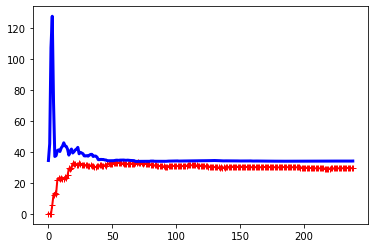

In [364]:
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([
("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
("lin_reg", LinearRegression()),
])
plot_learning_curves(polynomial_regression, X, y)
